## Importacion de Librerias necesarias


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns
sns.set()

## Importacion de datos y pre-procesamiento de la data

In [2]:
raw_csv_data = pd.read_csv("Index_modified.csv") 
df_comp=raw_csv_data.copy()
df_comp.set_index("date", inplace=True)
#df_comp=df_comp.asfreq('b') linea que remuestrea dias laborales('b')
#df_comp=df_comp.fillna(method='ffill')

In [3]:
df_comp.info() # Informacion

<class 'pandas.core.frame.DataFrame'>
Index: 7752 entries, 1994-01-07 to 2023-10-10
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   spx     7752 non-null   float64
 1   dax     7752 non-null   float64
 2   ftse    7752 non-null   float64
 3   nikkei  7752 non-null   float64
dtypes: float64(4)
memory usage: 302.8+ KB


In [4]:
df_comp['market_value']=df_comp.ftse ## Valores de la columna market_value corresponde a FTSE

In [5]:
df_comp

,spx,dax,ftse,nikkei,market_value
date,,,,,
1994-01-07,469.900000,2224.950000,3445.980000,18124.010000,3445.980000
1994-01-10,475.270000,2225.000000,3440.580000,18443.440000,3440.580000
1994-01-11,474.130000,2228.100000,3413.770000,18485.250000,3413.770000
1994-01-12,474.170000,2182.060000,3372.020000,18793.880000,3372.020000
1994-01-13,472.470000,2142.370000,3360.010000,18577.260000,3360.010000
...,...,...,...,...,...
2023-10-04,4263.750000,15099.919922,7412.500000,30526.880859,7412.500000
2023-10-05,4258.189941,15070.219727,7451.500000,31075.359375,7451.500000
2023-10-06,4308.500000,15229.769531,7494.600098,30994.669922,7494.600098


In [6]:
#Eliminacion de las demas variables
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
#Separacion de data original en d_test y df = df_train
#donde se podra pobrar la eficacia de los modelos para 
#entrenar y predecir nuevos datos
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [32]:
df

,market_value,res_price
date,,
1994-01-07,3445.980000,-1953.527052
1994-01-10,3440.580000,-7.942345
1994-01-11,3413.770000,-29.382458
1994-01-12,3372.020000,-44.675463
1994-01-13,3360.010000,-16.396098
...,...,...
2017-10-18,7542.866979,27.857359
2017-10-19,7523.038195,-17.272178
2017-10-20,7523.225958,2.866165


## The ACF

El gráfico resultante mostrará la autocorrelacion completa para diferentes retrasos (lags) a lo largo de la serie temporal. Cada barra o punto en el gráfico representa la correlación entre los valores de la serie en el lag correspondiente. Si la ACF muestra patrones significativos de correlación en ciertos lags, esto puede indicar estacionalidad o tendencias en los datos, lo que puede ser útil para modelar y pronosticar los precios

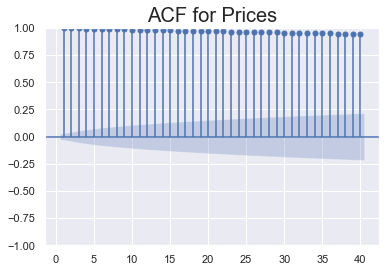

In [8]:
sgt.plot_acf(df.market_value, zero = False, lags = 40)
plt.title("ACF for Prices", size = 20)
plt.show()

In [9]:
##Libreria necesaria para la eliminacion de advertencias de codigo
import warnings 
warnings.filterwarnings("ignore")

## The PACF

El gráfico resultante mostrará la autocorrelacion parcial para diferentes retrasos (lags) a lo largo de la serie temporal. Cada barra o punto en el gráfico representa la correlación parcial entre los valores de la serie en el lag correspondiente después de eliminar el efecto de los retrasos intermedios. La PACF es útil para identificar la estructura de un modelo de series temporales de los precios, especialmente en modelos autorregresivos.

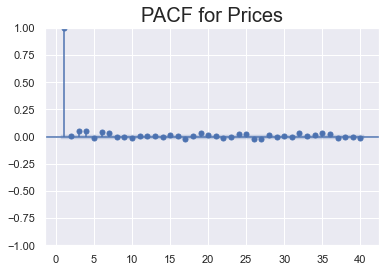

In [10]:
sgt.plot_pacf(df.market_value, lags = 40, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF for Prices", size = 20)
plt.show()

# Modelo Autorregresivos **AR(q)**

Los modelos autorregresivos AR(p) Los modelos autorregresivos, conocidos como modelos AR, describen el comportamiento 
temporal de una variable aleatoria con base en sus propios rezagos y a un error i.i.d. con media cero 
os modelos autorregresivos, conocidos como modelos AR, describen ey varianza σ 2. El número de rezagos utilizados es conocido como p. La forma general de este modelo 
mportamieestá dada por:

$$y_{t}=c+\phi_{1}Y_{t-1}$$

## The AR(1) Model

In [11]:
model_ar = ARIMA(df.market_value, order=(1,0,0))

In [12]:
results_ar = model_ar.fit()

In [13]:
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6201
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -34045.315
Date:                Sat, 14 Oct 2023   AIC                          68096.629
Time:                        15:41:34   BIC                          68116.827
Sample:                             0   HQIC                         68103.631
                               - 6201                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5399.5084    535.829     10.077      0.000    4349.302    6449.714
ar.L1          0.9989      0.001   1365.639      0.000       0.997       1.000
sigma2      3434.7476     36.803     93.329      0.000    3362.616    3506.879
===================================================================================
Ljung-Box (L1) (Q):                   0.43   Jarque-Bera (JB):              3558.89
Prob(Q):                              0.51   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                            -0.19
Prob(H) (two-sided):                  0.12   Kurtosis:                         6.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Higher-Lag AR Models

In [14]:
model_ar_2 = ARIMA(df.market_value, order=(2,0,0))
results_ar_2 = model_ar_2.fit()
results_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6201
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -34045.207
Date:                Sat, 14 Oct 2023   AIC                          68098.413
Time:                        15:41:34   BIC                          68125.343
Sample:                             0   HQIC                         68107.749
                               - 6201                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5399.5071    458.351     11.780      0.000    4501.156    6297.858
ar.L1          0.9906      0.009    112.042      0.000       0.973       1.008
ar.L2          0.0081      0.009      0.923      0.356      -0.009       0.025
sigma2      3434.3071     36.913     93.038      0.000    3361.959    3506.655
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3542.14
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                            -0.19
Prob(H) (two-sided):                  0.13   Kurtosis:                         6.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
model_ar_3 = ARIMA(df.market_value, order=(3,0,0))
results_ar_3 = model_ar_3.fit()
results_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6201
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -34038.375
Date:                Sat, 14 Oct 2023   AIC                          68086.751
Time:                        15:41:34   BIC                          68120.413
Sample:                             0   HQIC                         68098.421
                               - 6201                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5399.5071    475.136     11.364      0.000    4468.257    6330.757
ar.L1          0.9902      0.009    111.357      0.000       0.973       1.008
ar.L2         -0.0384      0.012     -3.163      0.002      -0.062      -0.015
ar.L3          0.0470      0.008      5.637      0.000       0.031       0.063
sigma2      3427.1547     36.879     92.929      0.000    3354.873    3499.436
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              3552.74
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               1.08   Skew:                            -0.22
Prob(H) (two-sided):                  0.10   Kurtosis:                         6.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
model_ar_4 = ARIMA(df.market_value, order=[4,0,0])
results_ar_4 = model_ar_4.fit()
results_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6201
Model:                 ARIMA(4, 0, 0)   Log Likelihood              -34029.550
Date:                Sat, 14 Oct 2023   AIC                          68071.100
Time:                        15:41:34   BIC                          68111.494
Sample:                             0   HQIC                         68085.104
                               - 6201                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5399.5071    493.178     10.948      0.000    4432.897    6366.117
ar.L1          0.9877      0.009    110.367      0.000       0.970       1.005
ar.L2         -0.0363      0.012     -2.973      0.003      -0.060      -0.012
ar.L3         -0.0059      0.011     -0.513      0.608      -0.028       0.017
ar.L4          0.0534      0.008      6.520      0.000       0.037       0.069
sigma2      3417.6302     37.553     91.008      0.000    3344.027    3491.233
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3367.27
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.08   Skew:                            -0.27
Prob(H) (two-sided):                  0.07   Kurtosis:                         6.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## LLR Test

In [17]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

## Comparing Higher-Lag AR Models

In [18]:
LLR_test(model_ar_2, model_ar_3)

0.0

In [19]:
LLR_test(model_ar_3, model_ar_4)

0.0

In [20]:
model_ar_4 = ARIMA(df.market_value, order=[4,0,0])
results_ar_4 = model_ar_4.fit()
print(results_ar_4.summary()) 
print ("LLR test: " + str(LLR_test(model_ar_3, model_ar_4)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 6201
Model:                 ARIMA(4, 0, 0)   Log Likelihood              -34029.550
Date:                Sat, 14 Oct 2023   AIC                          68071.100
Time:                        15:41:36   BIC                          68111.494
Sample:                             0   HQIC                         68085.104
                               - 6201                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5399.5071    493.178     10.948      0.000    4432.897    6366.117
ar.L1          0.9877      0.009    110.367      0.000       0.970       1.005
ar.L2         -0.0363      0.012     -2.973      0.0

In [21]:
model_ar_5 = ARIMA(df.market_value, order=(5,0,0))
results_ar_5 = model_ar_5.fit()
print(results_ar_5.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ar_4, model_ar_5)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 6201
Model:                 ARIMA(5, 0, 0)   Log Likelihood              -34029.311
Date:                Sat, 14 Oct 2023   AIC                          68072.621
Time:                        15:41:37   BIC                          68119.749
Sample:                             0   HQIC                         68088.960
                               - 6201                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5399.5071    489.939     11.021      0.000    4439.244    6359.770
ar.L1          0.9882      0.009    110.330      0.000       0.971       1.006
ar.L2         -0.0364      0.012     -2.977      0.0

In [22]:
model_ar_6 = ARIMA(df.market_value, order=(6,0,0))
results_ar_6 = model_ar_6.fit()
print(results_ar_6.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ar_5, model_ar_6)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 6201
Model:                 ARIMA(6, 0, 0)   Log Likelihood              -34024.359
Date:                Sat, 14 Oct 2023   AIC                          68064.718
Time:                        15:41:38   BIC                          68118.578
Sample:                             0   HQIC                         68083.391
                               - 6201                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5399.5071    508.760     10.613      0.000    4402.356    6396.658
ar.L1          0.9885      0.009    109.323      0.000       0.971       1.006
ar.L2         -0.0389      0.012     -3.151      0.0

In [23]:
model_ar_7 = ARIMA(df.market_value, order=(7,0,0))
results_ar_7 = model_ar_7.fit()
print(results_ar_7.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ar_6, model_ar_7)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 6201
Model:                 ARIMA(7, 0, 0)   Log Likelihood              -34021.604
Date:                Sat, 14 Oct 2023   AIC                          68061.208
Time:                        15:41:40   BIC                          68121.801
Sample:                             0   HQIC                         68082.215
                               - 6201                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5399.5071    520.782     10.368      0.000    4378.792    6420.222
ar.L1          0.9874      0.009    108.323      0.000       0.969       1.005
ar.L2         -0.0375      0.013     -2.993      0.0

In [24]:
model_ar_8 = ARIMA(df.market_value, order=(8,0,0))
results_ar_8 = model_ar_8.fit()
print(results_ar_8.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ar_7, model_ar_8)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 6201
Model:                 ARIMA(8, 0, 0)   Log Likelihood              -34021.480
Date:                Sat, 14 Oct 2023   AIC                          68062.960
Time:                        15:41:41   BIC                          68130.285
Sample:                             0   HQIC                         68086.301
                               - 6201                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5399.5071    522.425     10.335      0.000    4375.573    6423.441
ar.L1          0.9876      0.009    108.287      0.000       0.970       1.005
ar.L2         -0.0374      0.013     -2.983      0.0

In [25]:
print("LLR test: " + str(LLR_test(model_ar, model_ar_7, DF = 6)))

LLR test: 0.0


## Analysing the Residuals

In [26]:
df['res_price'] = results_ar_7.resid

In [27]:
df.res_price.mean()

0.4611636667382784

In [28]:
df.res_price.var()

4023.0211500770815

In [29]:
sts.adfuller(df.res_price)

(-85.48863155781655,
 0.0,
 0,
 6200,
 {'1%': -3.431405162820285,
  '5%': -2.8620062877330406,
  '10%': -2.56701820210718},
 67679.34906635997)

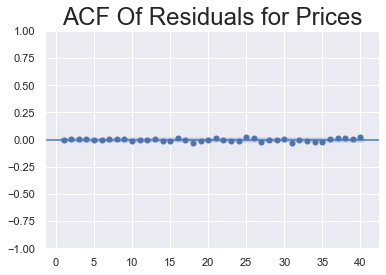

In [30]:
sgt.plot_acf(df.res_price, zero = False, lags = 40)
plt.title("ACF Of Residuals for Prices",size=24)
plt.show()

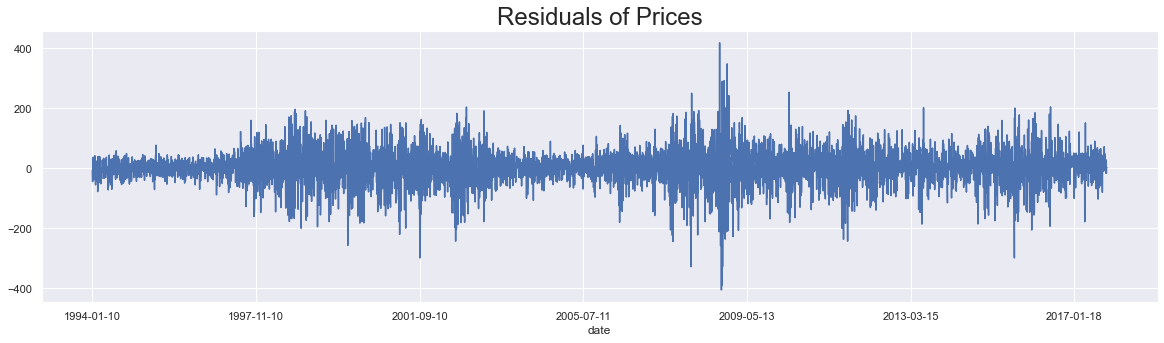

In [31]:
df.res_price[1:].plot(figsize=(20,5))
plt.title("Residuals of Prices",size=24)
plt.show()